In [1]:
import torch
import torch.nn as nn
import math
from torchviz import make_dot

# Сеть с множеством выходов 

Если сеть имеет множество выходов, то backward по их сумме эквивалентен backward-у по каждой из них 

## Пример 

In [2]:
criterion = nn.CrossEntropyLoss()

In [3]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
    def forward(self, x):
        a1 = torch.sin(x)
        b1 = a1 * a1
        b2 = torch.tan(b1)
        b3 = b2 + b2 * b2
        b4 = torch.sin(b3)
        loss1 = b4.sum()

        c = 2 * a1
        d = c + 1 
        d1 = torch.cos(d)
        loss2 = d1.sum()

        e = torch.sin(d1)
        loss3 = e.sum()
        return loss1, loss2, loss3    

In [4]:
model = MyModel()

In [5]:
def get_losses():
    torch.manual_seed(89)
    input = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
    loss1, loss2, loss3 = model(input)
    return input, loss1, loss2, loss3

### Разработка модели

In [6]:
input, loss1, loss2, loss3 = get_losses()

In [7]:
loss1.backward(retain_graph=True)

In [8]:
loss2.backward(retain_graph=True)

In [9]:
loss3.backward()

In [10]:
print(input.grad)

tensor([-3.1262e+00, -3.2873e+00, -1.6929e+00,  1.7363e-01, -1.6902e+00,
        -5.3823e+00,  8.4037e-07,  5.3823e+00,  1.6902e+00, -1.7363e-01,
         1.6929e+00,  3.2873e+00,  3.1262e+00,  2.0312e+00,  1.3226e+00,
         8.8789e-01, -2.2102e+00, -5.9737e+00,  2.6133e-07,  5.9737e+00,
         2.2102e+00, -8.8790e-01, -1.3226e+00, -2.0312e+00, -3.1262e+00])


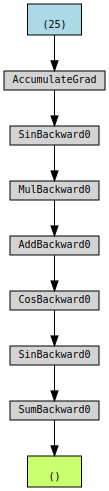

In [11]:
make_dot(loss3, params=dict(model.named_parameters()))

### backward по каждому выходу

In [6]:
input, loss1, loss2, loss3 = get_losses()

In [7]:
loss1.backward(retain_graph=True)

In [8]:
loss2.backward(retain_graph=True)

In [9]:
loss3.backward()

In [10]:
print(input.grad)

tensor([-3.1262e+00, -3.2873e+00, -1.6929e+00,  1.7363e-01, -1.6902e+00,
        -5.3823e+00,  8.4037e-07,  5.3823e+00,  1.6902e+00, -1.7363e-01,
         1.6929e+00,  3.2873e+00,  3.1262e+00,  2.0312e+00,  1.3226e+00,
         8.8789e-01, -2.2102e+00, -5.9737e+00,  2.6133e-07,  5.9737e+00,
         2.2102e+00, -8.8790e-01, -1.3226e+00, -2.0312e+00, -3.1262e+00])


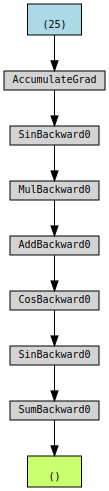

In [11]:
make_dot(loss3, params=dict(model.named_parameters()))

### backward по сумме ошибок

In [12]:
input, loss1, loss2, loss3 = get_losses()

In [13]:
loss1

tensor(6.8286, grad_fn=<SumBackward0>)

In [14]:
loss = loss1+loss2+loss3
loss.backward()
print(input.grad)

tensor([-3.1262e+00, -3.2873e+00, -1.6929e+00,  1.7363e-01, -1.6902e+00,
        -5.3823e+00,  8.4037e-07,  5.3823e+00,  1.6902e+00, -1.7363e-01,
         1.6929e+00,  3.2873e+00,  3.1262e+00,  2.0312e+00,  1.3226e+00,
         8.8789e-01, -2.2102e+00, -5.9737e+00,  2.6133e-07,  5.9737e+00,
         2.2102e+00, -8.8790e-01, -1.3226e+00, -2.0312e+00, -3.1262e+00])


# =====================

In [15]:
input, loss1, loss2, loss3 = get_losses()

In [16]:
loss1 += loss2+loss3

In [17]:
loss1

tensor(13.4809, grad_fn=<AddBackward0>)

In [18]:
loss1.backward()
print(input.grad)

tensor([-3.1262e+00, -3.2873e+00, -1.6929e+00,  1.7363e-01, -1.6902e+00,
        -5.3823e+00,  8.4037e-07,  5.3823e+00,  1.6902e+00, -1.7363e-01,
         1.6929e+00,  3.2873e+00,  3.1262e+00,  2.0312e+00,  1.3226e+00,
         8.8789e-01, -2.2102e+00, -5.9737e+00,  2.6133e-07,  5.9737e+00,
         2.2102e+00, -8.8790e-01, -1.3226e+00, -2.0312e+00, -3.1262e+00])
